In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
unpload = files.upload()

Saving abc.csv to abc.csv


In [ ]:
df = pd.read_csv('abc.csv',index_col='Date',parse_dates=True)
df.index.freq='D'

In [ ]:
df.head()


,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


In [ ]:
df = df[['Daily Confirmed']]
df.head()

,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


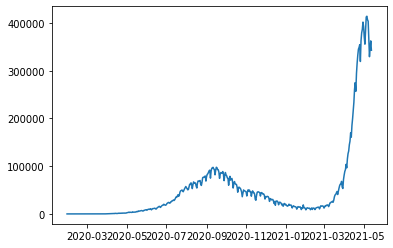

In [ ]:
plt.plot(df)

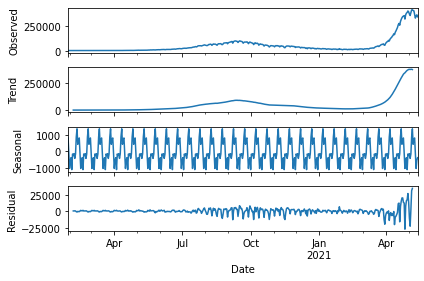

In [ ]:
results = seasonal_decompose(df['Daily Confirmed'],freq=15)
results.plot();


In [ ]:
len(df)

470

In [ ]:
train = df.iloc[:454]
test = df.iloc[454:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Daily Confirmed
 Date                       
 2020-01-30                1
 2020-01-31                0
 2020-02-01                0
 2020-02-02                1
 2020-02-03                1,             Daily Confirmed
 Date                       
 2021-05-09           366455
 2021-05-10           329491
 2021-05-11           348555
 2021-05-12           362632
 2021-05-13           343005)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 3
n_feature = 1
generator =  TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [ ]:
X,y = generator[0]
print("Given the Array:" , X.flatten())
print("Predict this y:", y)

Given the Array: [2.75548134e-06 0.00000000e+00 0.00000000e+00]
Predict this y: [[2.75548134e-06]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input = 100
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
354/354 [==============================] - 12s 31ms/step - loss: 0.0057
Epoch 2/50
354/354 [==============================] - 11s 31ms/step - loss: 9.7804e-04
Epoch 3/50
354/354 [==============================] - 11s 31ms/step - loss: 4.7490e-04
Epoch 4/50
354/354 [==============================] - 11s 31ms/step - loss: 0.0014
Epoch 5/50
354/354 [==============================] - 11s 31ms/step - loss: 7.6231e-04
Epoch 6/50
354/354 [==============================] - 11s 31ms/step - loss: 8.8662e-04
Epoch 7/50
354/354 [==============================] - 11s 31ms/step - loss: 3.7907e-04
Epoch 8/50
354/354 [==============================] - 11s 31ms/step - loss: 4.3688e-04
Epoch 9/50
354/354 [==============================] - 11s 31ms/step - loss: 3.4556e-04
Epoch 10/50
354/354 [==============================] - 11s 31ms/step - loss: 3.7416e-04
Epoch 11/50
354/354 [==============================] - 11s 31ms/step - loss: 5.5522e-04
Epoch 12/50
354/354 [============================

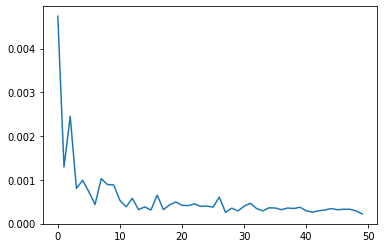

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-100:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_feature))

In [ ]:
model.predict(last_train_batch)

array([[0.9919302]], dtype=float32)

In [ ]:
scaled_test[0]

array([1.04544064])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [ ]:
test_predictions

[array([0.9919302], dtype=float32),
 array([0.99041957], dtype=float32),
 array([0.9957456], dtype=float32),
 array([1.0004183], dtype=float32),
 array([1.0050069], dtype=float32),
 array([1.0093672], dtype=float32),
 array([1.0131917], dtype=float32),
 array([1.0165159], dtype=float32),
 array([1.0185238], dtype=float32),
 array([1.020419], dtype=float32),
 array([1.0221565], dtype=float32),
 array([1.0235177], dtype=float32),
 array([1.0247717], dtype=float32),
 array([1.0258098], dtype=float32),
 array([1.0266587], dtype=float32),
 array([1.0273705], dtype=float32)]

In [ ]:
test.head()

,Daily Confirmed,Predictions
Date,,
2021-04-28,379404,359984.359863
2021-04-29,386773,359436.136185
2021-04-30,402014,361369.022668
2021-05-01,392576,363064.808467
2021-05-02,370090,364730.072500


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

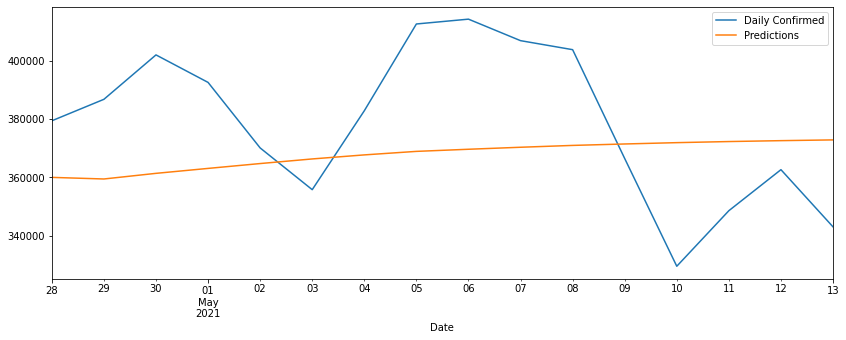

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Daily Confirmed'],test['Daily Confirmed']))
print(rmse)

0.0
